In [26]:
import pickle
import numpy as np
import gzip
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import nengo
from nengo.utils.ensemble import response_curves, tuning_curves

In [51]:
# filtered spike trains for all of the experiments
original = pickle.load(open("X.pkl","rb"))
unique = pickle.load(open("X1.pkl","rb"))

#exp 1
darkOriginal = pickle.load(open('X2p1.pkl','rb'))
darkOriginal2 = pickle.load(open('X2p2.pkl','rb'))
darkOriginal.extend(darkOriginal2)
#exp 2
darkUnique = pickle.load(open("X12.pkl","rb"))
#exp 3
brightOriginal = pickle.load(open("X3.pkl","rb"))
#exp 4
brightUnique = pickle.load(open("X13p1.pkl","rb"))
brightUnique2 = pickle.load(open("X13p2.pkl","rb"))
brightUnique.extend(brightUnique2)

In [199]:
# each filtered spike train has shape (84,15,5000)
# so for each of the 84 faces, average the spike activity on each of the 15
# dimensions that the neurons span. 
def spikeAve(data):
    dimensionAve = []
    for face in data:
        spikeAves = []
        for i,st in enumerate(face):
            #average neural activity on ith dimension for the face
            spikeAves.append(np.mean(st))
        dimensionAve.append(spikeAves)
    return dimensionAve

# find difference of average neuron spiking activity on each dimension
# that is we find the difference between 2 representations of the face,
# and see where the most change occured and the least change occured.
def getDiff(aves1,aves2):
    diffs = []
    for a1,a2 in zip(aves1,aves2):
        diff = []
        for x,y in zip(a1,a2):
            diff.append(x-y)
        diffs.append(diff)
    return np.transpose(diffs)

# find on which dimension did the representations vary the most by averaging
# activity on each dimension for each experiment, and taking the difference
# at each dimension of representation.
def getChanges(exp1,exp2):
    changes = getDiff(spikeAve(exp1),spikeAve(exp2))
    dims,N = np.shape(changes)
    sumChanges = []
    for d in range(dims):
        sumChange = 0
        for n in range(N):
            sumChange += changes[d][n]
        sumChanges.append(sumChange)
    del sumChanges[0]
    return sumChanges
        
def plotChanges(exp1,exp2,s1,s2):
    plt.plot(getChanges(exp1,exp2),'.-')
    plt.plot(np.zeros(14))
    plt.xlabel('Dimension of neuron representation')
    plt.ylabel('Spike activity change')
    plt.title('Average difference in representation in '+s1+' and '+s2)

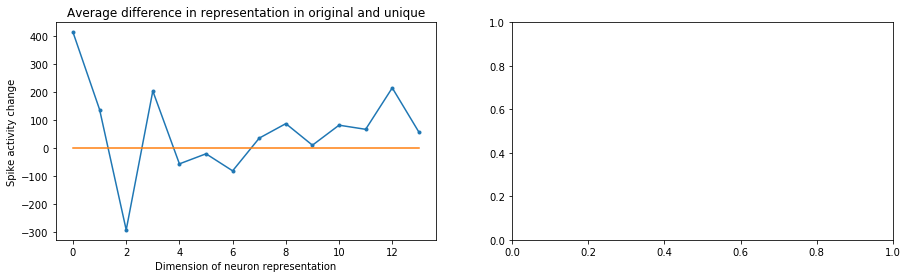

In [203]:
'''
original unique
original dark original
original bright original
unique dark unique
unique bright unique
'''
plt.subplots(1,2,figsize=(15,4))
plt.subplot(1,2,1)
plotChanges(original,unique,'original','unique')
plt.show()

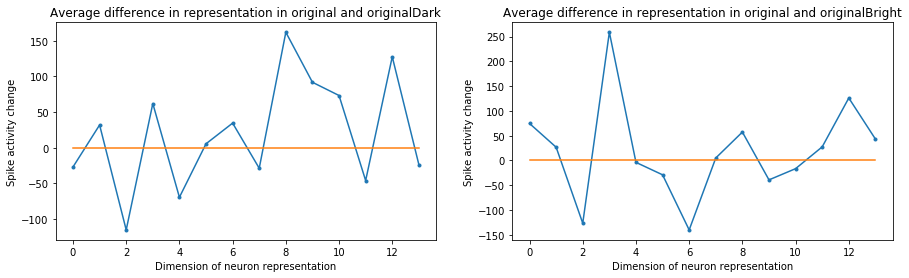

In [201]:
plt.subplots(1,2,figsize=(15,4))
plt.subplot(1,2,1)
plotChanges(original,darkOriginal,'original','originalDark')
plt.subplot(1,2,2)
plotChanges(original,brightOriginal,'original', 'originalBright')

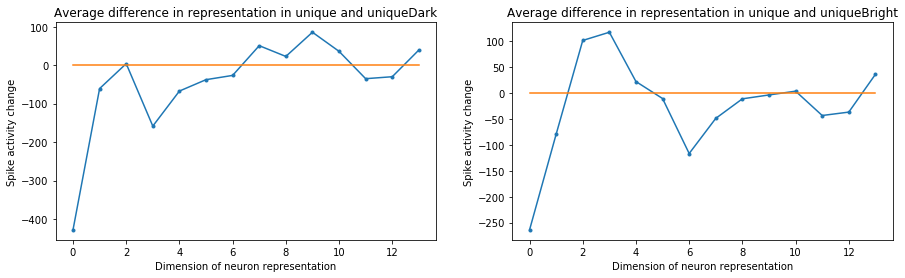

In [202]:
plt.subplots(1,2,figsize=(15,4))
plt.subplot(1,2,1)
plotChanges(unique,darkUnique,'unique','uniqueDark')
plt.subplot(1,2,2)
plotChanges(unique,brightUnique,'unique', 'uniqueBright')